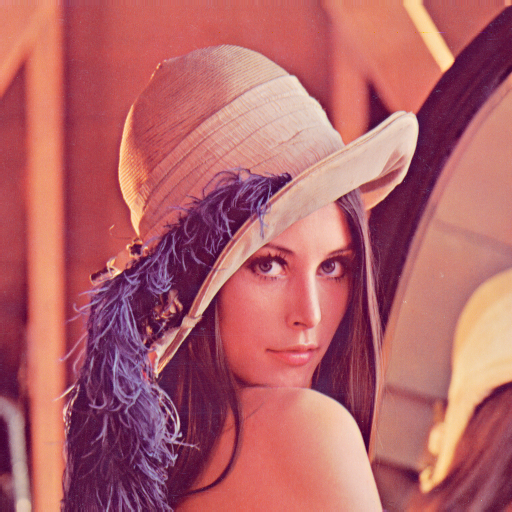

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_colored = Image . open ("/content/drive/MyDrive/AI and Machine Learning/Copy of Lenna_(test_image).png")
display ( image_colored )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


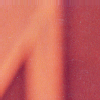

In [4]:
# Display only the top left corner of 100x100 pixels.

# Crop the image
cropped_image = image_colored.crop(( 0, 0, 100 ,100))
display(cropped_image)

 Shape of the image array : (512, 512, 3)


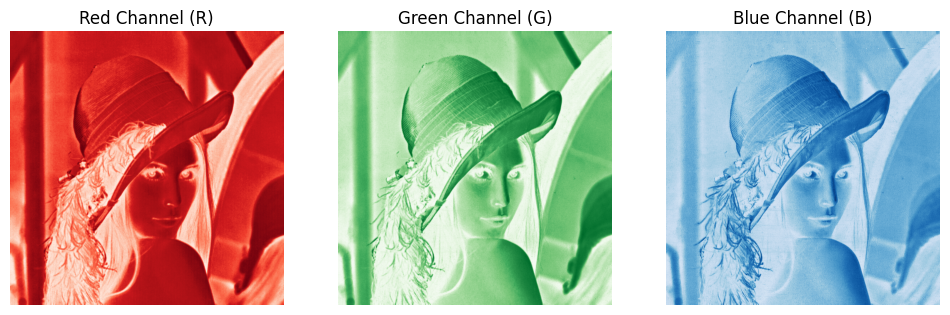

In [5]:
# Separate the image into its three color channels (Red, Green, and Blue) and display them
# individually, labeling each channel as R, G, and B.{Using NumPy.}

# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )

# Display the shape of the NumPy array (height , width ,channels )
print (" Shape of the image array :", image_array_colored . shape)

red_channel = image_array_colored [: , : , 0]
# display(red_channel)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(red_channel, cmap="Reds")  # Display Red channel
ax[0].set_title("Red Channel (R)")
ax[0].axis("off")

green_channel = image_array_colored [: , : , 1]
# display(green_channel)
ax[1].imshow(green_channel, cmap="Greens")  # Display Green channel
ax[1].set_title("Green Channel (G)")
ax[1].axis("off")

blue_channel = image_array_colored[:,:, 2]
# display(blue_channel)
ax[2].imshow(blue_channel, cmap="Blues")  # Display Blue channel
ax[2].set_title("Blue Channel (B)")
ax[2].axis("off")

plt.show()

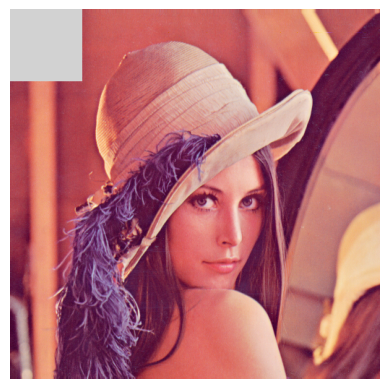

In [6]:
# Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
# light gray color), and then display the modified image.

# Convert to NumPy array
image_array = np.array(image_colored)

# Modify the top-left 100x100 region to have a pixel value of 210 (light gray)
image_array[:100, :100] = 210  # Applies to all channels (if RGB)

# Convert back to an image
modified_image = Image.fromarray(image_array)

# Display the modified image
plt.imshow(modified_image)
plt.axis("off")  # Hide axis
plt.show()

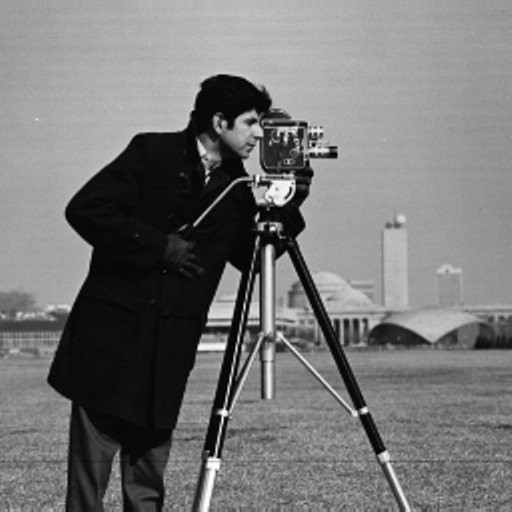

In [9]:
# Load and display a grayscale image.
# • Load a grayscale image using the Pillow library.
# • Display the grayscale image using matplotlib.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import PIL

image_gray = Image.open("/content/drive/MyDrive/AI and Machine Learning/Copy of cameraman.png")
display( image_gray )

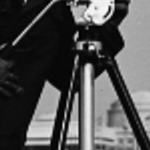

In [10]:
# Extract and display the middle section of the image (150 pixels).
# • Extract a 150 pixel section from the center of the image using NumPy array slicing.
# • Display this cropped image using matplotlib.

width, height = image_gray.size

left = (width - 150)/2
top = (height - 150)/2
right = (width + 150)/2
bottom = (height + 150)/2

crop_gray = image_gray.crop((left,top,right,bottom))
display(crop_gray)

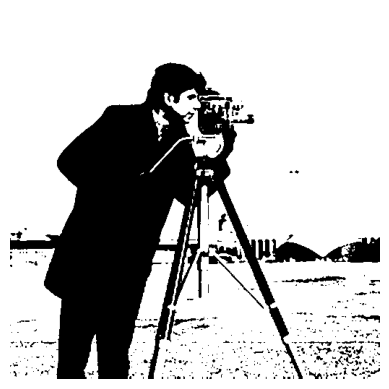

In [16]:
# Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).
# • Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
# above 100 to 255 (creating a binary image).
# • Display the resulting binary image.

image_gray = cv2.imread("/content/drive/MyDrive/AI and Machine Learning/Copy of cameraman.png", cv2.IMREAD_GRAYSCALE)

ret, bin_image = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)

plt.imshow(bin_image, cmap="gray")
plt.axis("off")
plt.show()



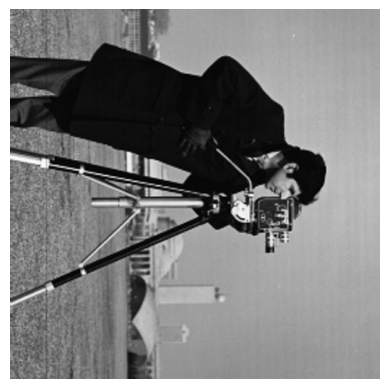

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming image_gray is a NumPy array
image_pil = Image.fromarray(image_gray)  # Convert NumPy array to PIL Image

# Rotate the image 90 degrees clockwise (270 degrees counterclockwise)
rotate_img = image_pil.rotate(270, resample=Image.BILINEAR, expand=True)

# Display the rotated image
plt.imshow(rotate_img, cmap="gray")
plt.axis("off")
plt.show()


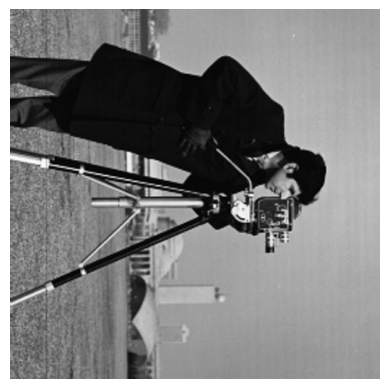

In [18]:
# Rotate the image 90 degrees clockwise and display the result.
# • Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
# the image array.
# • Display the rotated image using matplotlib.

# Load the image using Pillow for rotation
image_gray_pil = Image.open("/content/drive/MyDrive/AI and Machine Learning/Copy of cameraman.png")


# rotate image clockwise 90 degree
rotate_img = image_gray_pil.rotate(270, resample=Image.BILINEAR, expand=True)

plt.imshow(rotate_img, cmap="gray")
plt.axis("off")
plt.show()

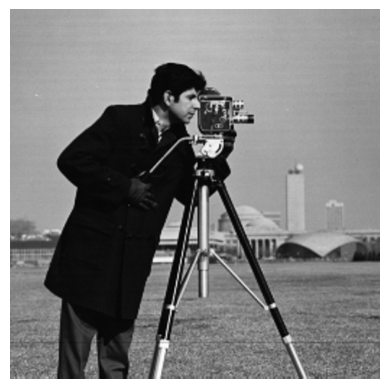

In [20]:
# Convert grayscale NumPy array to RGB format (3 channels)
image_conv_np = np.stack([image_gray] * 3, axis=-1)

# Display the RGB image
plt.imshow(image_conv_np)
plt.axis("off")
plt.show()


array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)
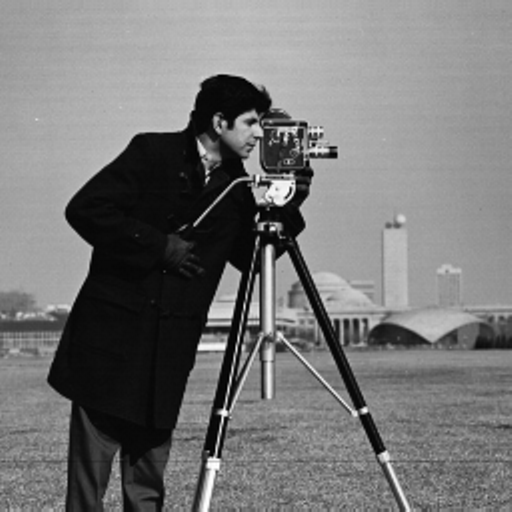

In [22]:
# Load and Prepare Data:
# • Fetch an image of you choice.{If colour convert to grayscale}
# • Center the dataset - Standaridze the Data.
# • Calculate the covaraince matrix of the Standaridze data.

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import PIL

# load image and convert to grayscale
image_LenaGray = Image.open("/content/drive/MyDrive/AI and Machine Learning/Copy of lena_gray.gif"). convert("L")

# Convert to numpy array
image_array = np.array(image_LenaGray)

# get dimension
height, width = image_array.shape
data = image_array.reshape(height, width)

# Center the dataset - Standaridze the Data.

# Compute mean of each column
mean = np.mean(data, axis = 0)

# subtract mean to center the data
centered_data = data - mean

# Calculate the covaraince matrix of the Standaridze data.
cov_matrix = np.cov(centered_data, rowvar=False)

display( image_gray )

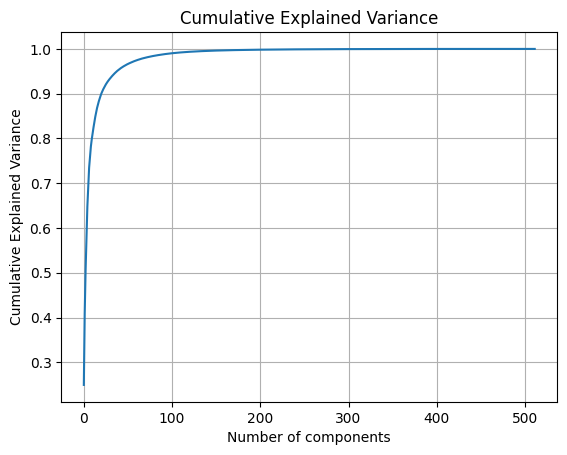

In [23]:
# Eigen Decomposition and Identifying Principal Components:


# • Compute Eigen Values and Eigen Vectors.
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# • Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.
sorted_indices = np.argsort(eigenvalues) [: : -1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# • Identify the Principal Components with the help of cumulative Sum plot.
explained_variance_ratio = eigenvalues/np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

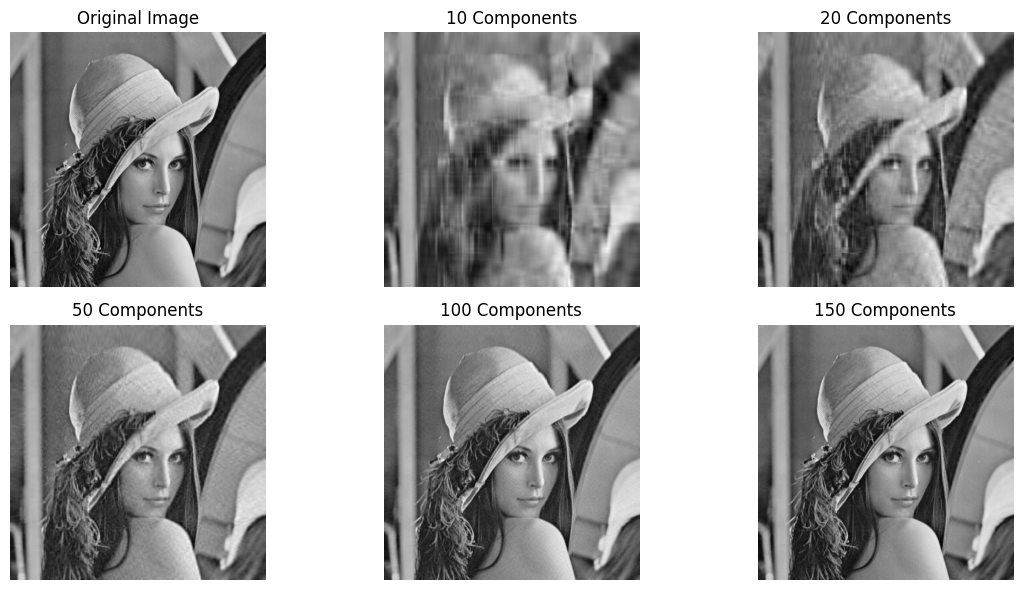

In [24]:

# Experiment 1: Using 10 components (k1 = 10)
k1 = 10
components1 = eigenvectors[:, :k1]

# Project the data onto the first k1 components
compressed_data1 = np.dot(centered_data, components1)

# Reconstruct the image from compressed data
decompressed_data1 = np.dot(compressed_data1, components1.T) + mean

# Experiment 2: Using 20 components (k2 = 20)
k2 = 20
components2 = eigenvectors[:, :k2]

# Project the data onto the first k2 components
compressed_data2 = np.dot(centered_data, components2)

# Reconstruct the image from compressed data
decompressed_data2 = np.dot(compressed_data2, components2.T) + mean


# Experiment 3: Using 50 components
k3 = 50
components3 = eigenvectors[:, :k3]

# Project the data onto the first k3 components
compressed_data3 = np.dot(centered_data, components3)

# Reconstruct the image from compressed data
decompressed_data3 = np.dot(compressed_data3, components3.T) + mean

# Experiment 4: Using 100 components
k4 = 100
components4 = eigenvectors[:, :k4]

# Project the data onto the first k4 components
compressed_data4 = np.dot(centered_data, components4)

# Reconstruct the image from compressed data
decompressed_data4 = np.dot(compressed_data4, components4.T) + mean

# Experiment 5: Using 150 components
k5 = 150
components5 = eigenvectors[:, :k5]

# Project the data onto the first k4 components
compressed_data5 = np.dot(centered_data, components5)

# Reconstruct the image from compressed data
decompressed_data5 = np.dot(compressed_data5, components5.T) + mean


# Plot the results
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Decompressed Image using 10 components
plt.subplot(2, 3, 2)
plt.imshow(decompressed_data1, cmap="gray")
plt.title("10 Components")
plt.axis("off")

# Decompressed Image using 20 components
plt.subplot(2, 3, 3)
plt.imshow(decompressed_data2, cmap="gray")
plt.title("20 Components")
plt.axis("off")

# Decompressed Image using 50 components
plt.subplot(2, 3, 4)
plt.imshow(decompressed_data3, cmap="gray")
plt.title("50 Components")
plt.axis("off")

# Decompressed Image using 100 components
plt.subplot(2, 3, 5)
plt.imshow(decompressed_data4, cmap="gray")
plt.title("100 Components")
plt.axis("off")

# Decompressed Image using 100 components
plt.subplot(2, 3, 6)
plt.imshow(decompressed_data5, cmap="gray")
plt.title("150 Components")
plt.axis("off")



# Adjust layout to avoid overlap and make it visually appealing
plt.tight_layout()
plt.show()